### Binary search tree

Tree

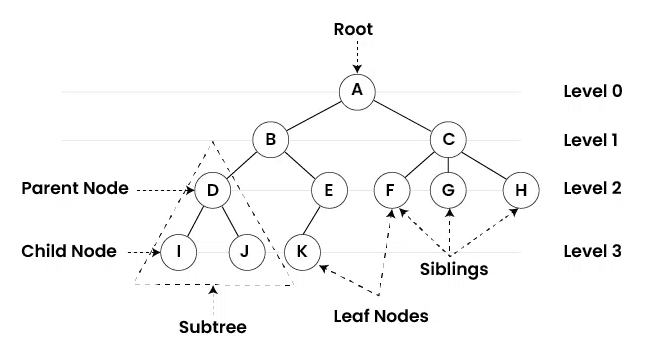

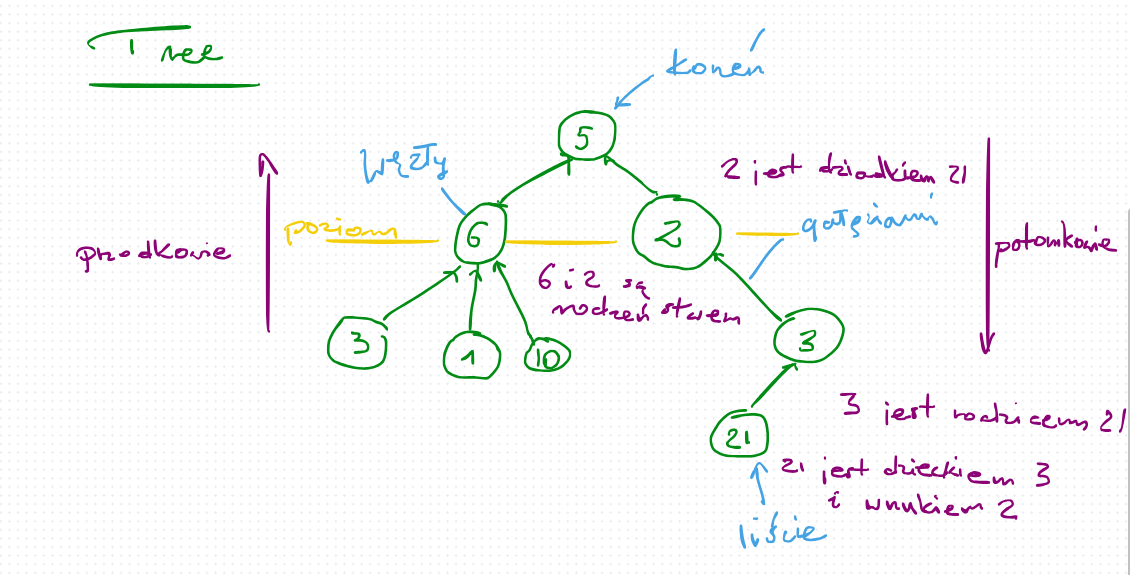

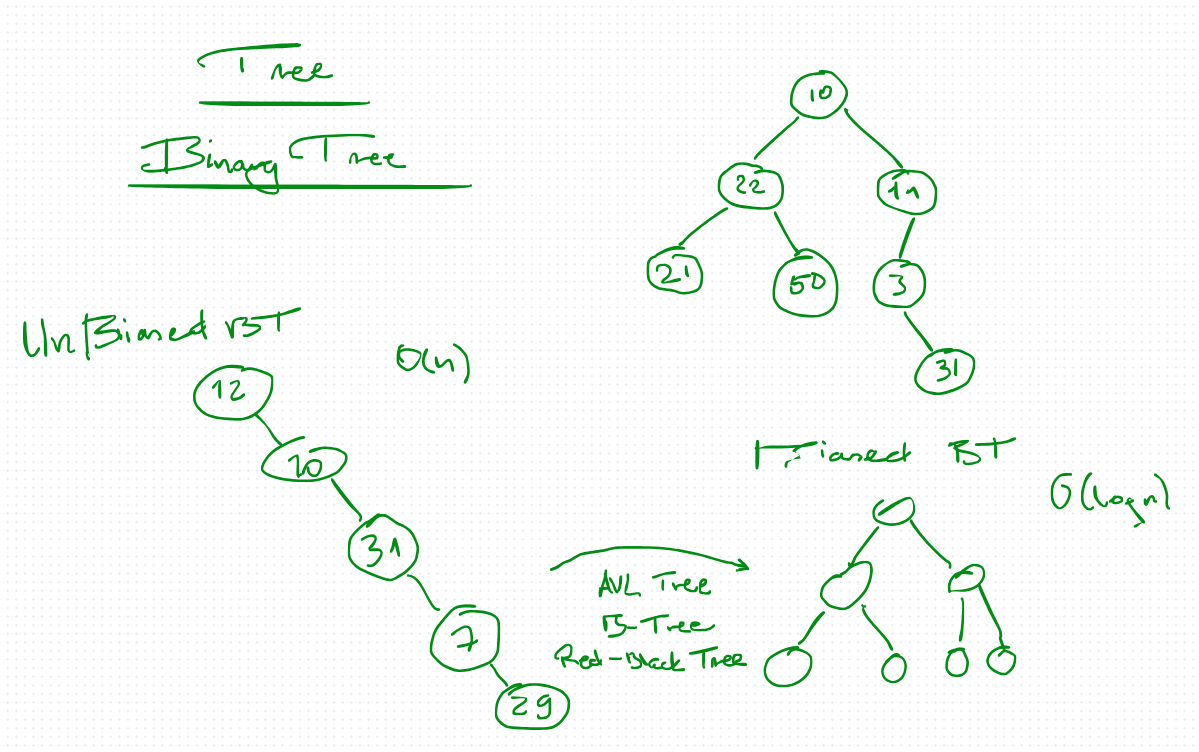

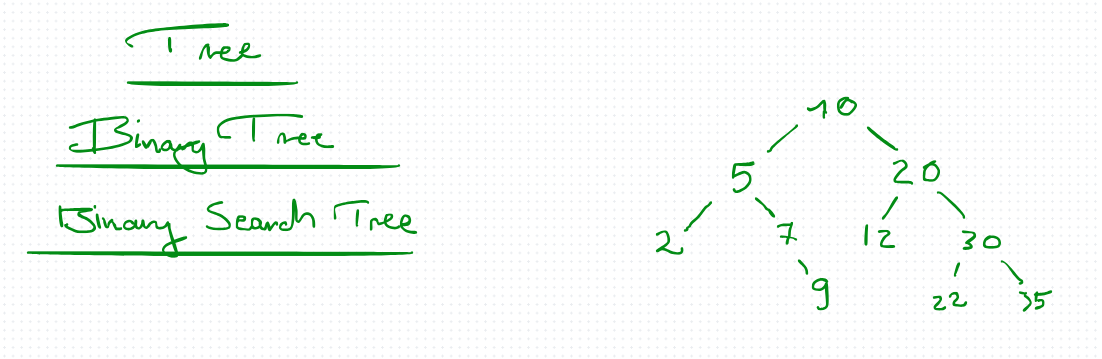

Binary tree

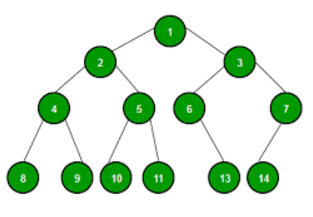

Binary search tree - drzewo przeszukiwań binarnych

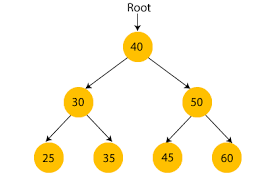

Zbalansowane (ang. balanced) vs niezbalansowane (ang. unbalanced) drzewa binarne.

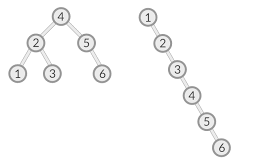

Przejście (ang. traversing) drzewa

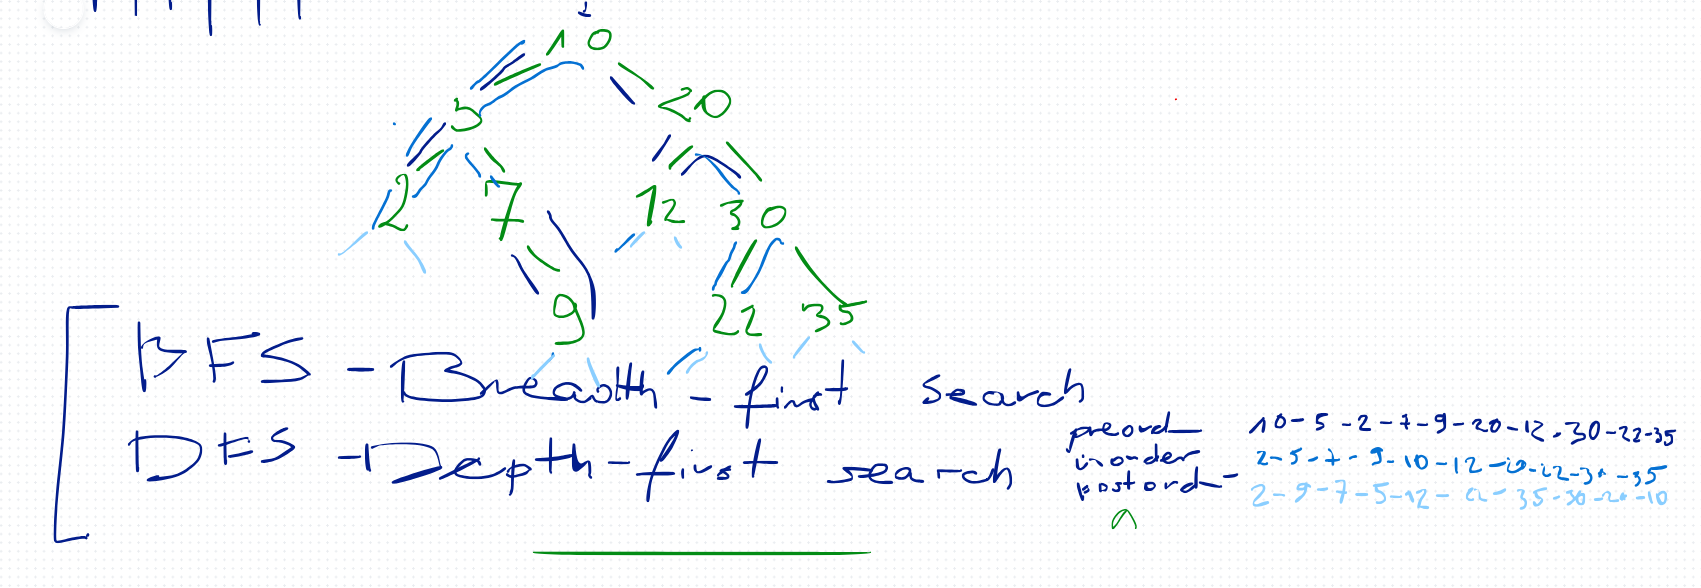

Po co nam bst?

Przeszukiwanie ma średnią złożoność obliczeniową $O(\log n)$. Najgorsza to wciąż $O(n)$ (w niezbalansowanym przypadku drzewo degeneruje się do listy i odrzucamy po jednym elemencie).

In [3]:
class Node:
    def __init__(self, key):
        self.left_child = self.right_child = None
        self.parent = None  # makes things a lot easier (especially
        # for deletion
        self.key = key
        self.value = None

    def __repr__(self):
        return f"{self.key}, {self.value}"

In [67]:
class BinarySearchTree:
    def __init__(self, root=None):
        self.root = None

    # O(n) worst i O(log n) avg
    def __contains__(self, key) -> bool:
        current_node = self.root
        
        while current_node is not None:
            if current_node.key == key:
                return True
            elif key < current_node.key:
                current_node = current_node.left_child
            else:
                current_node = current_node.rigth_child
        
        return False
    
    # O(n) worst i O(log n) avg
    def __repr__(self):
        return self._in_order_traversal(self.root)

    # O(n) worst i O(log n) avg
    def insert(self, key, value):
        new_node = Node(key)
        new_node.value = value

        # I - puste drzewo
        if self.root is None:
            self.root = new_node
            return
            
        # II - niepuste drzewo (to poszukujemy miejsca na wstawienie)
        current_node = self.root

        while True:
            if key < current_node.key:
                if current_node.left_child is None:
                    current_node.left_child = new_node
                    new_node.parent = current_node
                    break
                else:
                    current_node = current_node.left_child
            elif key > current_node.key:
                if current_node.right_child is None:
                    current_node.right_child = new_node
                    new_node.parent = current_node
                    break
                else:
                    current_node = current_node.right_child
            else:
                current_node.value = value
                break

    # O(n) worst i O(log n) avg
    def search(self, key):
        current_node = self.root
        
        while True:
            if current_node.key == key or current_node is None:
                return current_node
            elif key < current_node.key:
                current_node = current_node.left_child
            else:
                current_node = current_node.rigth_child

    # O(n) worst i O(log n) avg
    def delete(self, key):
        node = self.search(key)

        if node is None:
            raise KeyError("Node with the given key does not exists")

        self._delete(node)
    
    def _delete(self, node):
        # 1. leaf node
        if node.left_child is None and node.right_child is None:
            if self.parent == None:
                self.root = None
            else:
                if node.parent.left_child == node:
                    node.parent.left_child = None
                else:
                    node.parent.right_child = None

                node.parent = None

        # 2. one child node
        elif node.left_child is None or node.right_child is None:
            if node.left_child is not None:
                child_node = node.left_child
            else:
                child_node = node.right_child

            if node.parent is None:
                node_child.parent = None
                self.root = node_child
            else:
                if node.parent.left_child == node:
                    node.parent.left_child = child_node
                else:
                    node.parent.right_child = child_child

                child_node.parent = node.parent
        
        # 3. two child nodes
        else:
            successor = self.successor(node)
            node.key = successor.key
            node.value = successor.value

            self._delete(successor)

    def _successor(self, node):
        # na prawo raz, a potem lewo, lewo, lewo, ... aż do None
        if node is None:
            raise ValueError("Cannot find successor of None")

        if node.right_child is None:
            return None
        else:
            current_node = node.rigth_child
            while current_node.left_child is not None:
                current_node = current_node.left_child
            
            return current_node
    
    # O(n)
    def traverse(self, order):
        if order == "inorder":
            return self._in_order_traversal(self.root)
        elif order == "preorder":
            return self._pre_order_traversal(self.root)
        elif order == "postorder":
            return self._post_order_traversal(self.root)
        elif order == "level":
            return self._level_order_traversal(self.root)
        else:
            raise ValueError("Unknown order")

    # dfs
    def _in_order_traversal(self, node, output=""):
        if node:
            output = self._in_order_traversal(node.left_child, output)
            if not output:
                output += f"{node.key}"
            else:
                output += f" -> {node.key}"
            output = self._in_order_traversal(node.right_child, output)
        return output

    # dfs
    def _pre_order_traversal(self, node, output=""):
        if node:
            if not output:
                output += f"{node.key}"
            else:
                output += f" -> {node.key}"
            output = self._pre_order_traversal(node.left_child, output)
            output = self._pre_order_traversal(node.right_child, output)
        return output

    # dfs
    def _post_order_traversal(self, node, output=""):
        if node:
            output = self._post_order_traversal(node.left_child, output)
            output = self._post_order_traversal(node.right_child, output)
            if not output:
                output += f"{node.key}"
            else:
                output += f" -> {node.key}"
        return output

    # bfs
    def _level_order_traversal(self, node):  # bfs
        queue = [self.root]
        output = ""
        
        while len(queue) > 0:
            current_node = queue.pop(0)
            if current_node.parent is None:
                output += f"{current_node.key}"
            else:
                output += f" -> {current_node.key}"
                
            if current_node.left_child is not None:
                queue.append(current_node.left_child)

            if current_node.right_child is not None:
                queue.append(current_node.right_child)
        
        return output                

In [68]:
bst = BinarySearchTree()

In [69]:
bst.insert(10, 'hello')
bst.insert(5, 'hello')
bst.insert(20, 'hello')
bst.insert(2, 'hello')
bst.insert(7, 'hello')
bst.insert(12, 'hello')
bst.insert(30, 'hello')
bst.insert(9, 'hello')
bst.insert(22, 'hello')
bst.insert(35, 'hello')

In [70]:
print(bst.traverse('preorder'))

10 -> 5 -> 2 -> 7 -> 9 -> 20 -> 12 -> 30 -> 22 -> 35


In [71]:
print(bst.traverse('inorder'))

2 -> 5 -> 7 -> 9 -> 10 -> 12 -> 20 -> 22 -> 30 -> 35


In [72]:
print(bst.traverse('postorder'))

2 -> 9 -> 7 -> 5 -> 12 -> 22 -> 35 -> 30 -> 20 -> 10


In [73]:
print(bst.traverse('level'))

10 -> 5 -> 20 -> 2 -> 7 -> 12 -> 30 -> 9 -> 22 -> 35


Złożoność obliczeniowa większości operacji (search, insert, delete) zależy od tego czy drzewo jest zbalansowane. Jeżeli jest to najgorszy przypadek to O(log n), ale jeżeli nie jest to O(n). Dla traversal zawsze O(n).